# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

## Indest Data

In [2]:
df = pd.read_csv('Frozen_Dessert_Production.csv', index_col='DATE',infer_datetime_format=True)
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0+ KB


In [4]:
df.columns = ['Production']

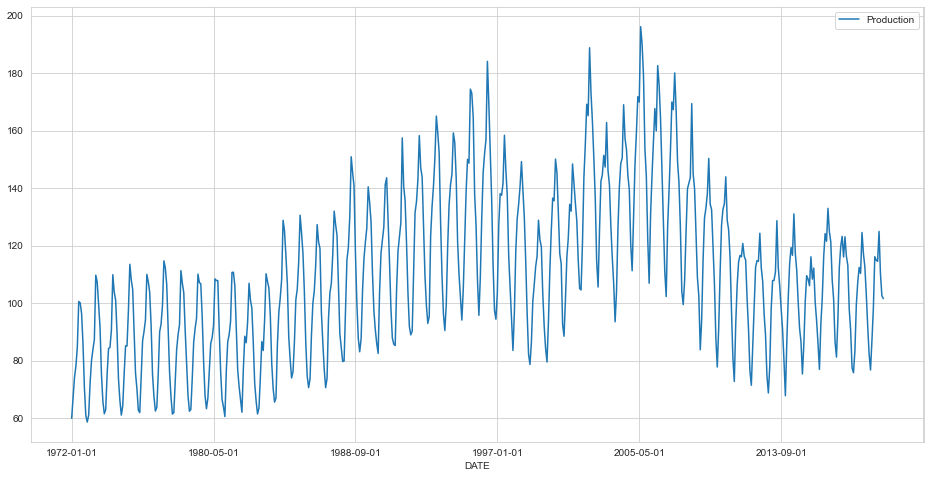

In [5]:
df.plot(figsize=(16,8));

## Preprocessing of Data

### Train Test Split

In [6]:
#cycle 12, o yuzden test datami 12 den buyuk vermem gerekir.

len(df)

573

In [7]:
len(df)-20

553

In [8]:
test_size = 20

In [9]:
test_ind = len(df)-test_size

In [10]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [11]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-09-01,97.912
2017-10-01,90.473
2017-11-01,77.438


In [12]:
test

,Production
DATE,
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584
2018-07-01,117.222
2018-08-01,112.678
2018-09-01,103.312
2018-10-01,92.132


### Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
 
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [14]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 12
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = 1)

In [15]:
len(generator)

541

In [16]:
X, y = generator[0]

In [17]:
print(f'Given the Array: \n\n{X.flatten()}')
print()
print(f'Predict this y: \n\n {y}')

Given the Array: 

[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]

Predict this y: 

 [[0.01774221]]


## Modelling & Model Performance

### Import related libraries

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

### Creating Model

### with "tanh" activation function

In [19]:
n_features = 1

In [20]:
model = Sequential()
model.add(LSTM(200, activation = 'tanh', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', patience = 8)

In [22]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [23]:
model.fit_generator(generator, epochs = 25,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/25
541/541 [==============================] - 3s 3ms/step - loss: 0.0170 - val_loss: 0.0034
Epoch 2/25
541/541 [==============================] - 2s 3ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 3/25
541/541 [==============================] - 2s 3ms/step - loss: 0.0042 - val_loss: 0.0018
Epoch 4/25
541/541 [==============================] - 2s 3ms/step - loss: 0.0037 - val_loss: 0.0023
Epoch 5/25
541/541 [==============================] - 2s 3ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 6/25
541/541 [==============================] - 2s 3ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 7/25
541/541 [==============================] - 2s 3ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 8/25
541/541 [==============================] - 2s 3ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 9/25
541/541 [==============================] - 2s 3ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 10/25
541/541 [==============================] - 2s 3ms/step - loss: 0.0033 - val_loss: 0.0024

#### Evaluate on Test Data

<AxesSubplot:>

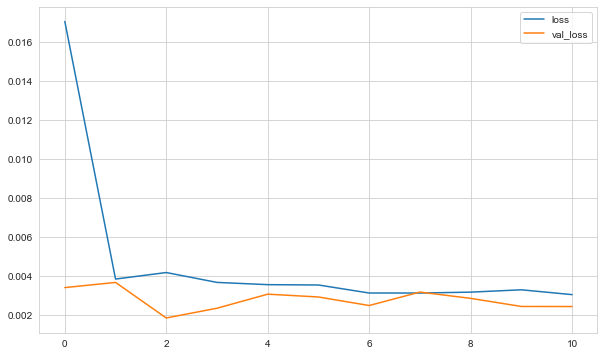

In [24]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [26]:
y_pred = model.predict(validation_generator)

In [27]:
eval_metrics(test_scaled[-8:], y_pred)

r2_score: 0.35708812879652685 
 mae: 0.041218644550658795 
 mse: 0.002434848225274333 
 rmse: 0.04934418127068614


In [28]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [29]:
eval_metrics(test_scaled, test_predictions)

r2_score: 0.19141324862318054 
 mae: 0.07079474822963054 
 mse: 0.007083464497348056 
 rmse: 0.08416332037977148


#### Inverse Transformations and Comparing

In [30]:
true_predictions = scaler.inverse_transform(test_predictions)

In [31]:
test['Predictions'] = true_predictions

In [32]:
test

,Production,Predictions
DATE,,
2018-02-01,99.490,98.396
2018-03-01,107.315,108.422
2018-04-01,112.431,113.404
2018-05-01,110.354,115.113
2018-06-01,124.584,113.095
2018-07-01,117.222,106.776
2018-08-01,112.678,97.140
2018-09-01,103.312,87.052
2018-10-01,92.132,80.821


#### Calculation R2 Score and Error Metrics

<AxesSubplot:xlabel='DATE'>

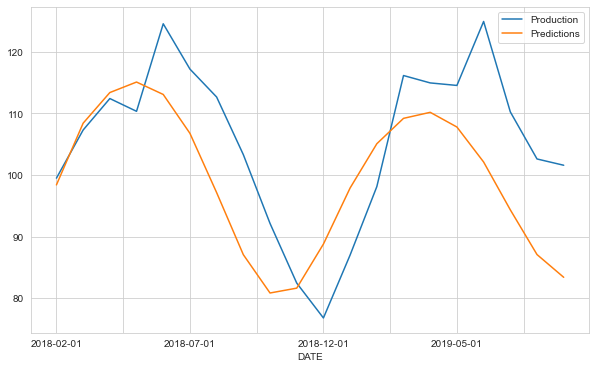

In [33]:
test.plot()

In [34]:
eval_metrics(test.Production, test.Predictions)

r2_score: 0.1914132486231801 
 mae: 9.735261928574594 
 mse: 133.94882856462408 
 rmse: 11.573626422371861


### with "relu" activation function

In [35]:
model = Sequential()
model.add(LSTM(120, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', patience = 6)

In [37]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [38]:
model.fit_generator(generator, epochs = 15,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/15
541/541 [==============================] - 2s 2ms/step - loss: 0.0192 - val_loss: 0.0049
Epoch 2/15
541/541 [==============================] - 1s 2ms/step - loss: 0.0083 - val_loss: 0.0040
Epoch 3/15
541/541 [==============================] - 1s 2ms/step - loss: 0.0078 - val_loss: 0.0021
Epoch 4/15
541/541 [==============================] - 1s 2ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 5/15
541/541 [==============================] - 1s 2ms/step - loss: 0.0044 - val_loss: 0.0023
Epoch 6/15
541/541 [==============================] - 1s 2ms/step - loss: 0.0044 - val_loss: 0.0033
Epoch 7/15
541/541 [==============================] - 1s 2ms/step - loss: 0.0038 - val_loss: 0.0098
Epoch 8/15
541/541 [==============================] - 1s 2ms/step - loss: 0.0040 - val_loss: 0.0026
Epoch 9/15
541/541 [==============================] - 1s 2ms/step - loss: 0.0035 - val_loss: 0.0023


#### Evaluate on Test Data

<AxesSubplot:>

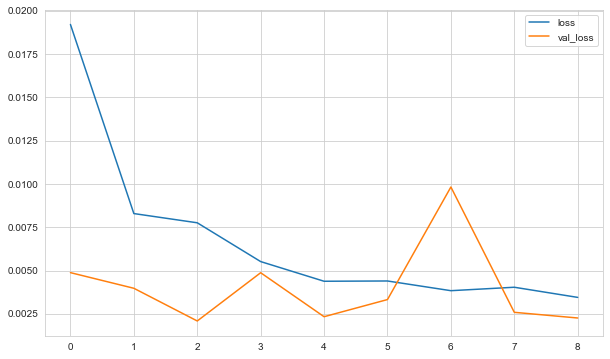

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [41]:
y_pred = model.predict(validation_generator)

In [42]:
eval_metrics(test_scaled[-8:], y_pred)

r2_score: 0.40162055277052655 
 mae: 0.04104753174088985 
 mse: 0.0022661941712166797 
 rmse: 0.047604560403565116


In [43]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [44]:
eval_metrics(test_scaled, test_predictions)

r2_score: 0.7291887909153847 
 mae: 0.036004266086034145 
 mse: 0.0023723880978366563 
 rmse: 0.04870716680157712


#### Inverse Transformations and Comparing

In [45]:
true_predictions = scaler.inverse_transform(test_predictions)

In [46]:
test['Predictions'] = true_predictions

In [47]:
test

,Production,Predictions
DATE,,
2018-02-01,99.490,100.925
2018-03-01,107.315,112.903
2018-04-01,112.431,120.100
2018-05-01,110.354,124.289
2018-06-01,124.584,125.012
2018-07-01,117.222,121.708
2018-08-01,112.678,114.063
2018-09-01,103.312,102.650
2018-10-01,92.132,90.440


#### Calculation R2 Score and Error Metrics

<AxesSubplot:xlabel='DATE'>

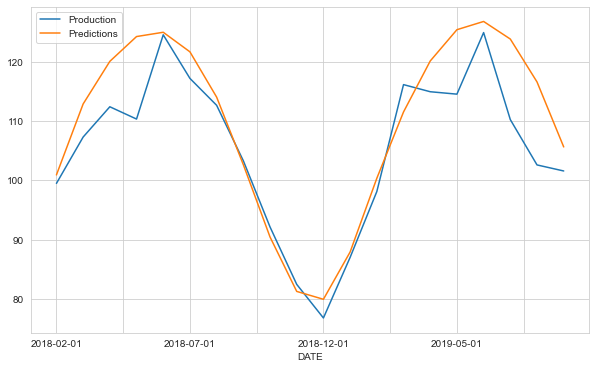

In [48]:
test.plot()

In [49]:
eval_metrics(test.Production, test.Predictions)

r2_score: 0.7291887909153851 
 mae: 4.951087046128285 
 mse: 44.862031386597295 
 rmse: 6.69791246483539


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [50]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [51]:
length = 12 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [52]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 2s 2ms/step - loss: 0.0198
Epoch 2/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0079
Epoch 3/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 4/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0051
Epoch 5/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0048
Epoch 6/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0042
Epoch 7/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0039
Epoch 8/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0037
Epoch 9/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0033
Epoch 10/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0034
Epoch 11/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 12/15
561/561 [==============================] - 1s 2ms/step - loss: 0.0028
Epoch 13/15
561/561 [====

In [53]:
scaled_full_data.shape

(573, 1)

In [54]:
scaled_full_data[-length:].shape

(12, 1)

In [55]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis = 1)

In [56]:
forecast = scaler.inverse_transform(forecast)

In [61]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [62]:
forecast_index = pd.date_range(start = '2019-10-01', periods = periods, freq = 'MS')

In [63]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

<AxesSubplot:>

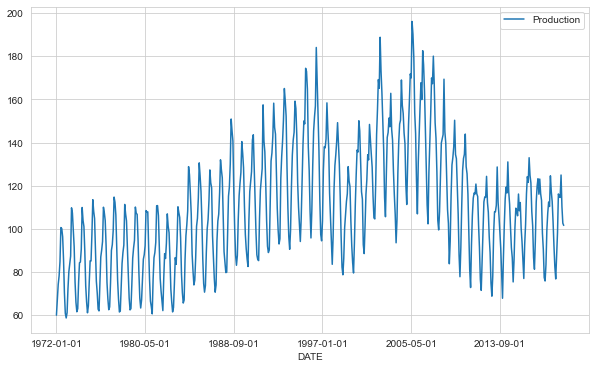

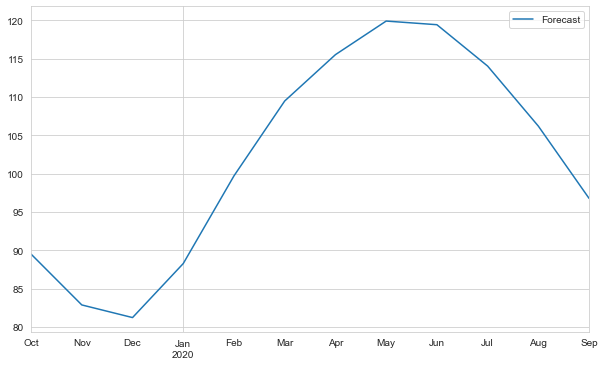

In [64]:
df.plot()
forecast_df.plot()